In [1]:
from model_structures.model_uncondition import DiT_Uncondition_models
from diffusion import create_diffusion

model = DiT_Uncondition_models["DiT_Uncondition-B/4"](
        input_size=32
    )
diffusion = create_diffusion(str(1000))

In [ ]:
list(range(10, 0))

: 

In [3]:
end_step = 5
list(range(end_step, 10))[::-1]

[9, 8, 7, 6, 5]

/home/AD/xiw136/anaconda3/envs/DiT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('../datasets/gan_data')
dataset

Dataset ImageFolder
    Number of datapoints: 60000
    Root location: ../datasets/gan_data

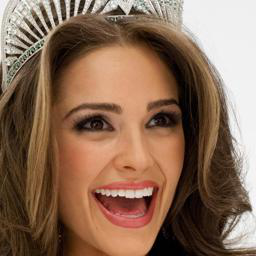

In [12]:
dataset[30000][0]

In [1]:
import torch
import torch.nn as nn
from model_structures import resnet, discriminator
net = resnet.ResNet()
net = discriminator.Pretrained_ResNet_Discriminator(net)
x1 = torch.rand((10, 4, 32, 32))
y1 = net(x1)
y1.shape

AttributeError: 'ResNet' object has no attribute 'fc'

In [12]:
y1

tensor([[1.6720, 1.3306, 0.9475,  ..., 0.0000, 0.7648, 1.0346],
        [0.8868, 0.0000, 1.3646,  ..., 0.0000, 0.0000, 0.0000],
        [3.6659, 3.7026, 2.7838,  ..., 0.5543, 1.5178, 1.3130],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0263, 0.0499, 0.0790],
        [0.7808, 0.2304, 0.8533,  ..., 3.9753, 3.9743, 4.2762],
        [1.5862, 1.9369, 0.2653,  ..., 0.8254, 3.2477, 1.6207]],
       grad_fn=<ReshapeAliasBackward0>)

In [19]:
output = ((y1-y2)**2)

In [20]:
output.mean(dim=list(range(1, len(output.shape)))).shape

torch.Size([10])

In [21]:
a = torch.rand((10, 2048))
d = torch.rand(10)
d.mean(), a.mean()

(tensor(0.5659), tensor(0.5029))

In [22]:
d.mean() + 0.2*a.mean()

tensor(0.6664)

In [24]:
(d+0.2*a.mean(dim=-1)).mean()

tensor(0.6664)

In [1]:
import torch.nn as nn
import torchvision.models as models

class ResNet(nn.Module):
    def __init__(self, resolution=32,  num_classes=1000):
        super(ResNet, self).__init__()
        self.resolution = resolution
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.resnet.conv1 = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        if num_classes != 1000:
            self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
    
    def forward(self, x):
        return self.resnet(x)
    
net = ResNet(num_classes=2)

In [2]:
net

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [5]:
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding
import torch 
import torch.nn as nn
class ResNetDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3)
        temb_channels = 256
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        self.block1 = ResnetBlock2D(in_channels=64, out_channels=128, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block2 = ResnetBlock2D(in_channels=128, out_channels=256, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        self.block3 = ResnetBlock2D(in_channels=256, out_channels=512, temb_channels=temb_channels, time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 1)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        x = self.conv1(x)
        
        x = self.block1(x, t)
        x = self.block2(x, t)
        x = self.block3(x, t)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        x = self.sigmoid(x)
        
        return x

discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(16)

output = discriminator(x, t)
print(output)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x16 and 128x256)

In [7]:

import torch 
import torch.nn as nn
from diffusers.models.resnet import ResnetBlock2D
from diffusers.models.embeddings import TimestepEmbedding, Timesteps

class ResNetDiscriminator(nn.Module):
    def __init__(
        self,
        input_size = 32,
        in_channels = 4,
        block_output_channels = (64, 128, 256, 512),
        class_num = 1,
        ):
        super().__init__()
        self.input_size = input_size
        self.class_num = class_num
        
        time_embed_dim = block_output_channels[0] * 4
        timestep_input_dim = block_output_channels[0]
        
        self.time_proj = Timesteps(block_output_channels[0], flip_sin_to_cos=True, downscale_freq_shift=0)
        self.time_embedding = TimestepEmbedding(timestep_input_dim, time_embed_dim)
        
        self.conv1 = nn.Conv2d(in_channels, block_output_channels[0], kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        
        self.layer1 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[0], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer2 = ResnetBlock2D(in_channels=block_output_channels[0], 
                                    out_channels=block_output_channels[1], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer3 = ResnetBlock2D(in_channels=block_output_channels[1], 
                                    out_channels=block_output_channels[2], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        self.layer4 = ResnetBlock2D(in_channels=block_output_channels[2], 
                                    out_channels=block_output_channels[3], 
                                    temb_channels=time_embed_dim, 
                                    time_embedding_norm = 'scale_shift')
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc = nn.Linear(block_output_channels[3], class_num)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, t):
        t = t * torch.ones(x.shape[0], dtype=t.dtype, device=t.device)
        t_emb = self.time_proj(t)
        emb = self.time_embedding(t_emb)
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.maxpool(x)
        
        x = self.layer1(x, emb)
        x = self.layer2(x, emb)
        x = self.layer3(x, emb)
        x = self.layer4(x, emb)
        
        x = self.avg_pool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        if self.class_num == 1:
            x = self.sigmoid(x)
        return x

# Initialize the discriminator
discriminator = ResNetDiscriminator()

x = torch.randn(64, 4, 32, 32)
t = torch.randn(64)

# Forward Pass
output = discriminator(x, t)
print(output.shape)

torch.Size([64, 1])
